In [11]:
import os
from pathlib import Path
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
MODEL_PATH = "../models/best_model.pth"
SUBMISSION_FOLDER = "submission"
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

In [3]:
print(f"Loading model from {MODEL_PATH}...")
model = torch.load(MODEL_PATH, map_location=DEVICE, weights_only=False)
model.eval()  
print("Model loaded!")

Loading model from ../models/best_model.pth...
Model loaded!


In [4]:
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),  # or your model input size
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],  # adjust if needed
                         std=[0.229, 0.224, 0.225])
])

In [5]:
submission_path = Path(SUBMISSION_FOLDER)
if not submission_path.exists():
    print(f"Folder '{SUBMISSION_FOLDER}' not found!")
    exit(1)

In [6]:
image_files = list(submission_path.glob("*.*"))  # all files
if not image_files:
    print(f"No files found in '{SUBMISSION_FOLDER}'!")
    exit(1)

In [7]:
print(f"Found {len(image_files)} file(s) in '{SUBMISSION_FOLDER}'.")

Found 1 file(s) in 'submission'.


In [9]:
for img_path in image_files:
    try:
        img = Image.open(img_path).convert("RGB")
        input_tensor = preprocess(img).unsqueeze(0).to(DEVICE)  # add batch dim

        with torch.no_grad():
            output = model(input_tensor)

        # Assuming a single output for binary classification
        if output.shape[1] == 1:  # Sigmoid output
            prob = torch.sigmoid(output).item()
            label = "Authentic" if prob >= 0.5 else "Fake"
        else:  # Softmax output
            prob, idx = torch.max(torch.softmax(output, dim=1), dim=1)
            label = f"Class {idx.item()}"  # replace with actual class names if needed
            prob = prob.item()
        print(f"{img_path.name}: {label} ({prob:.4f})")
    except Exception as e:
        print(f"Error processing {img_path.name}: {e}")
        


375.JPG: Authentic (0.9167)


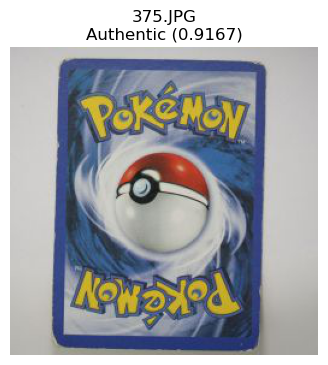

In [12]:
plt.figure(figsize=(4, 4))
plt.imshow(img)
plt.title(f"{img_path.name}\n{label} ({prob:.4f})")
plt.axis("off")
plt.show()